In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import convertdate
from tqdm import tqdm
import matplotlib
import matplotlib.font_manager as fm
import seaborn as sns

In [20]:
def define_plot_fonts():
    fm.fontManager.addfont('../references/cmunorm.ttf')
    matplotlib.rc('xtick', labelsize=14) 
    matplotlib.rc('ytick', labelsize=14)
    matplotlib.rcParams['font.family'] = 'CMU Concrete'

In [5]:
rz = pd.read_parquet('../data/raw/RZ_processed.parquet')

In [22]:
df = pd.read_csv('../data/processed_data.tsv', sep='\t', encoding='utf8', na_values=pd.NA).convert_dtypes()
df.doc_date = pd.to_datetime(df.doc_date)
df.origin_date = pd.to_datetime(df.origin_date)
df['doc_year'] = df.doc_date.dt.year
#df.delta = pd.to_timedelta(df.delta, unit='days')
#df = df[df.delta.isin(range(0,120))]

In [15]:
places = pd.read_csv('../data/places/places.tsv', sep='\t', encoding='utf8')

In [16]:
delta = pd.read_csv('../data/places/average_times.tsv', sep='\t', encoding='utf8', index_col='Unnamed: 0')

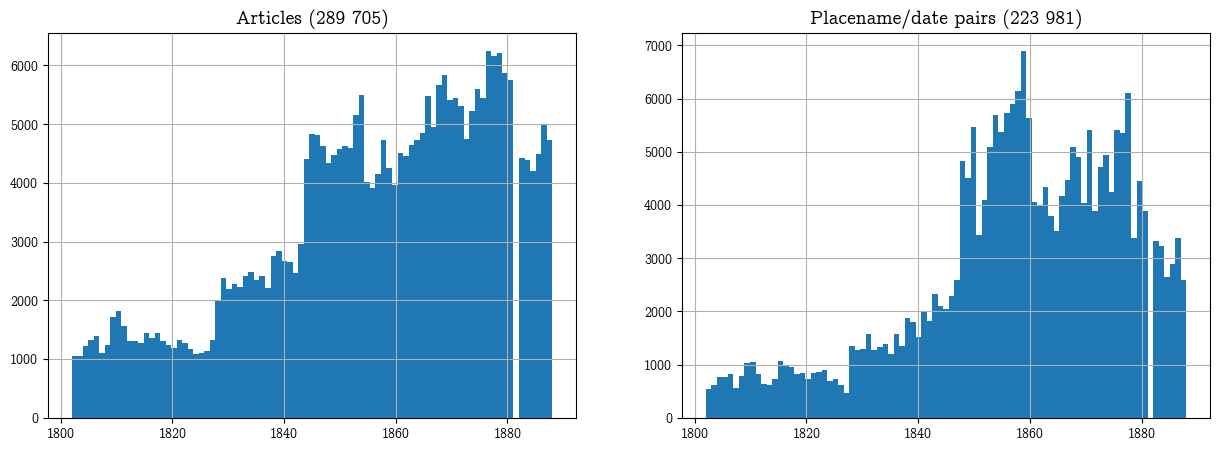

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

rz.year.hist(ax=ax1, bins=87)
df.doc_date.dt.year.hist(ax=ax2, bins=87)

ax1.set_title('Articles (289 705)', fontsize=14)
ax2.set_title('Placename/date pairs (223 981)', fontsize=14)

#plt.savefig('../references/images/articles_data.png', bbox_inches='tight')

plt.show()

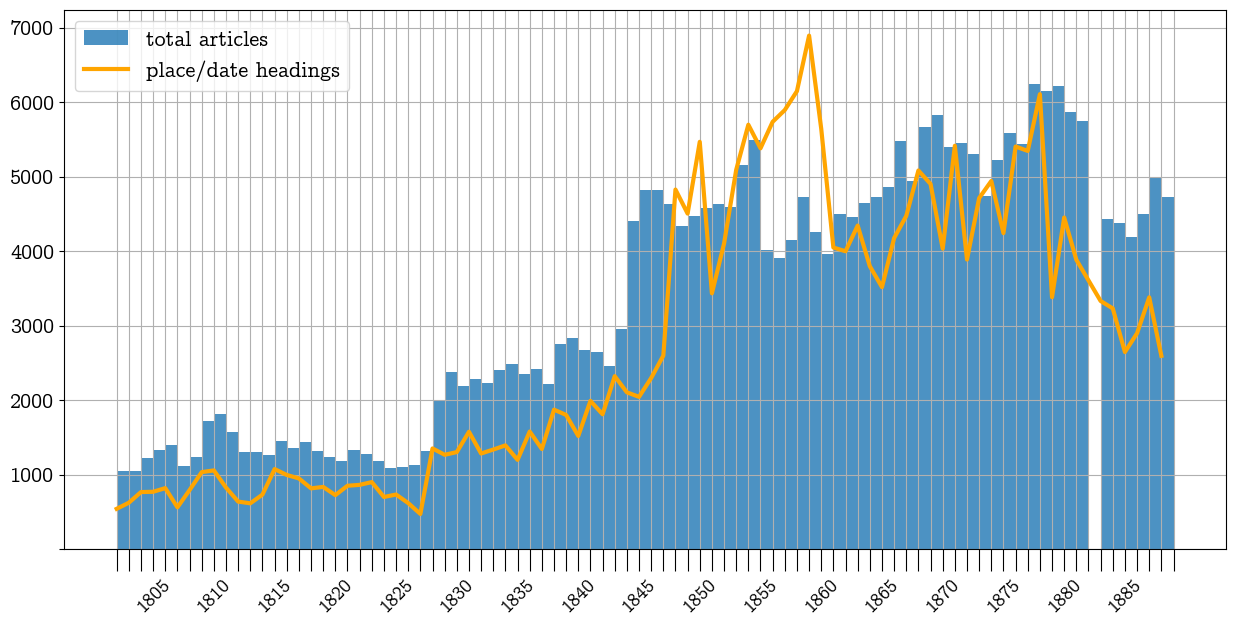

In [28]:
def distribution_histogram(rz):
    
    define_plot_fonts()
    
    fig, ax = plt.subplots(figsize=(15,7))
    
    rz.year.hist(ax=ax, bins=range(min(rz.year), max(rz.year+2)), alpha=0.8, label='total articles')
    df.groupby('doc_year')['doc_year'].count().plot(ax=ax, color='orange', linewidth=3, label='place/date headings')

    plt.yticks(fontsize=16)
    plt.xlabel(None)
    ax.set_xticks(ticks=range(1802, 1890), labels=[num if num%5==0 else '' for num in range(1802,1890)])
    plt.tick_params(axis='x', size=16, rotation=45)
    
    ax.set_yticks(ticks=range(0,7001,1000), labels=['', 1000, 2000, 3000, 4000, 5000, 6000, 7000])
    ax.grid(visible=True, which='both')
    
    plt.legend(fontsize=16)    
    
    plt.savefig('../references/images/articles_headings_histogram.png', bbox_inches='tight')

    plt.show()
    
distribution_histogram(rz)

In [54]:
from itertools import cycle

In [62]:
cmap(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [60]:
cmap = matplotlib.cm.tab20

In [ ]:
def assign_colors_to_places(places, cmap):
    
    return 
    
    

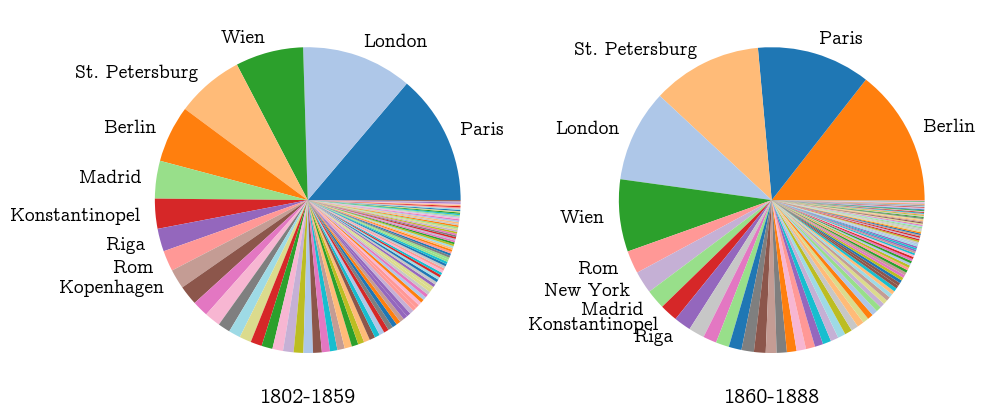

In [83]:
def pie_plot(timeranges, n_labels, cmap, savepath=None):
    
    fig, axes = plt.subplots(ncols=2, figsize=(10, 8))
    
    places = df.placename.value_counts().index
    colors = dict(zip(places, cycle([cmap(i) for i in range(cmap.N)])))
    
    for ax, timerange in zip(axes, timeranges):
        data = df[df.doc_date.dt.year.isin(timerange)].placename.value_counts()[:100]
        labels = [label for label in data.index[:n_labels]] + ['']*(100-n_labels)
        data.plot.pie(ax=ax,
                      labels=labels,
                      colors=[colors[place] for place in data.index])
        
        ax.set_ylabel('')
        ax.set_title(f'{timerange[0]}-{timerange[-1]}', fontsize=16, y=-0.05)
        
    fig.tight_layout()
    
    if savepath:
        plt.savefig(savepath, bbox_inches='tight')
        
    plt.show()
    

pie_plot([range(1802, 1860), range(1860, 1889)], 10, matplotlib.cm.tab20,
        savepath='../references/images/pie_plots.png')

In [82]:
df.placename.value_counts()[:5].sum()/len(df)

0.4722222222222222

In [86]:
sum(df[df.doc_year < 1860].placename.value_counts()[['Paris', 'London', 'Berlin', 'St. Petersburg', 'Wien']])/len(df[df.doc_year < 1860])

0.4217833082079192

In [87]:
sum(df[df.doc_year > 1859].placename.value_counts()[['Paris', 'London', 'Berlin', 'St. Petersburg', 'Wien']])/len(df[df.doc_year > 1859])

0.5224583280315562

In [181]:
def placename_frequencies(placenames):
    
    lengths = df.groupby('doc_year')['doc_year'].count().reindex(range(1802, 1889)).rolling(3, min_periods=1).mean()
    
    data = []
    
    for place in placenames:
        place_data = df.loc[df.placename==place].groupby('doc_year')['placename'].count().reindex(range(1802,1889)).rolling(3, min_periods=1).mean()/lengths
        data.append(place_data)
        
    plt.figure(figsize=(15,7))
    plt.stackplot(range(1802,1889), data, labels=placenames)
    plt.grid()
    plt.legend(reversed(plt.legend().legendHandles), reversed(placenames))
    plt.show()   

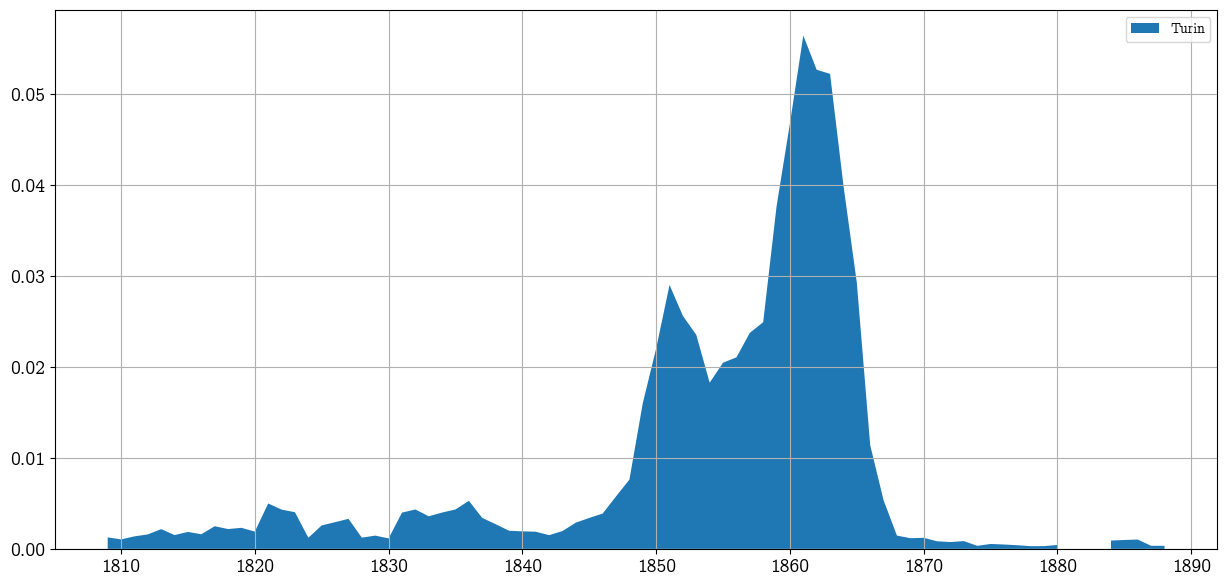

In [182]:
placename_frequencies(['Turin'])

In [164]:
ranges = [range(1802, 1820), range(1820, 1840), range(1840, 1860), range(1860, 1880)]

for start, stop in zip(range(1800, 1880, 10), range(1810, 1890, 10)):
    print(start, '-', stop, ': ',df.loc[df.doc_year.isin(range(start, stop))].placename.value_counts().index.get_loc('Turin'))

1800 - 1810 :  188
1810 - 1820 :  70
1820 - 1830 :  63
1830 - 1840 :  49
1840 - 1850 :  21
1850 - 1860 :  7
1860 - 1870 :  7
1870 - 1880 :  113


In [298]:
def plot_speed(names, rolling=1, savepath=None):

    fig = plt.figure(figsize=(15,7))

    for name in names:
        delta[name].rolling(rolling, min_periods=1).mean().reindex(range(1802,1889)).plot(label=name)

    plt.xticks(ticks=range(1802,1889), labels=[str(yr) if yr%5==0 else '' for yr in range(1802,1889)],
               size=16,
               rotation=45, ha='right')
    plt.yticks(size=16)
    plt.ylabel('days', size=18)
    #plt.grid(which='major', linewidth=1.2)
    plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
    plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
    plt.minorticks_on()
    plt.legend(fontsize=16, loc='upper right',
               ncol=1 if len(names) < 11 else 2)
    
    if savepath:
        plt.savefig(savepath, bbox_inches='tight')

    plt.show()

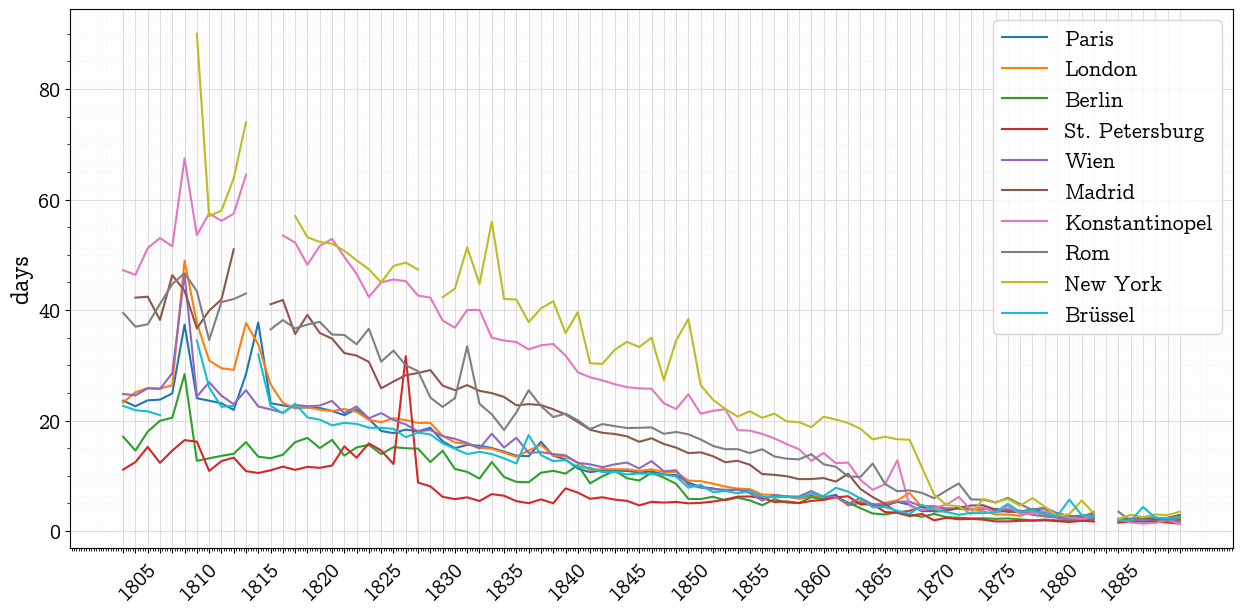

In [299]:
plot_speed([place for place in df.placename.value_counts()[:11].index if place != 'Riga'], rolling=1,)
           #savepath='../references/images/news_speed.png')

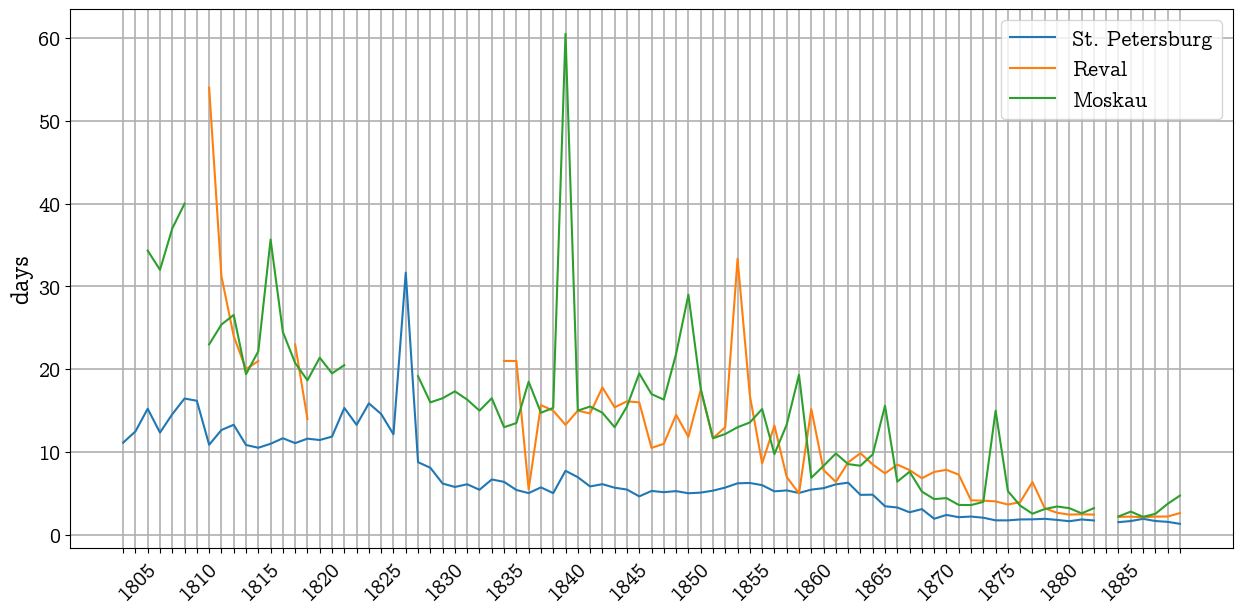

In [279]:
plot_speed(['St. Petersburg', 'Reval', 'Moskau'])

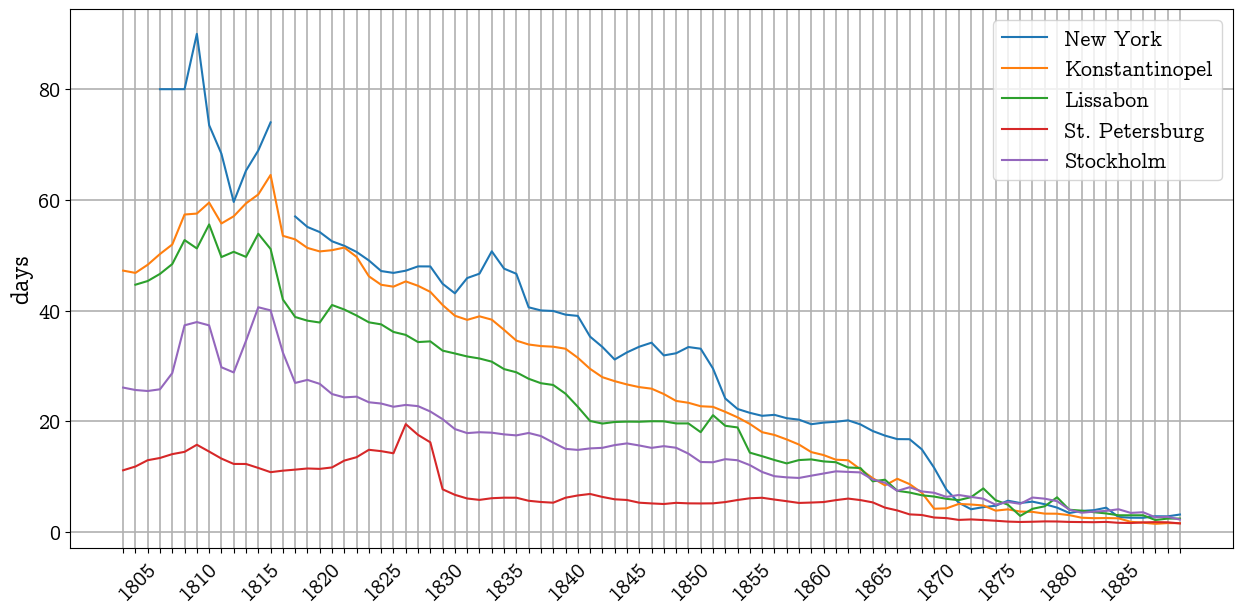

In [270]:
plot_speed(['New York', 'Konstantinopel', 'Lissabon', 'St. Petersburg', 'Stockholm'], rolling=3,
           savepath='../references/images/news_speed_NYK_KON_LIS_STP_STK.png')

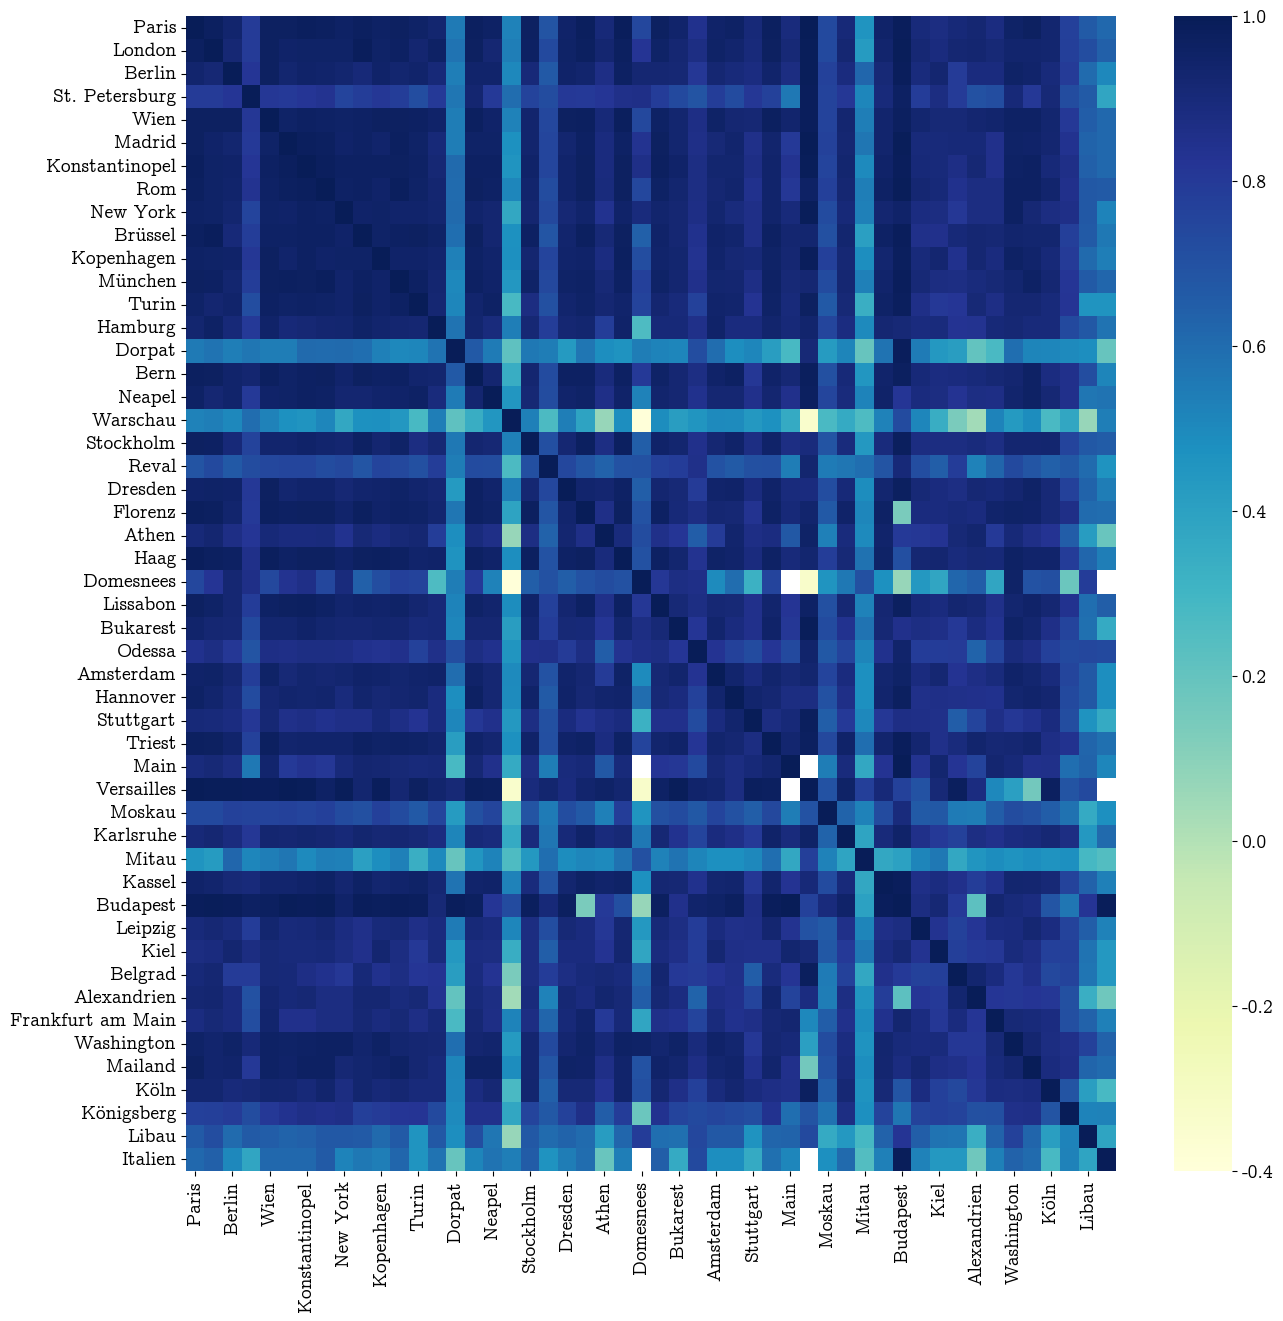

In [248]:
def plot_speed_correlations(places):
    
    data = pd.DataFrame([delta[name].reindex(range(1802,1889)) for name in places]).T
    
    plt.figure(figsize=(15,15))
    sns.heatmap(data.corr(), cmap="YlGnBu")
    #plt.xticks(rotation=45, ha='right')
    plt.show()
    
plot_speed_correlations([place for place in df.placename.value_counts()[:51].index if place != 'Riga'])

<AxesSubplot: >

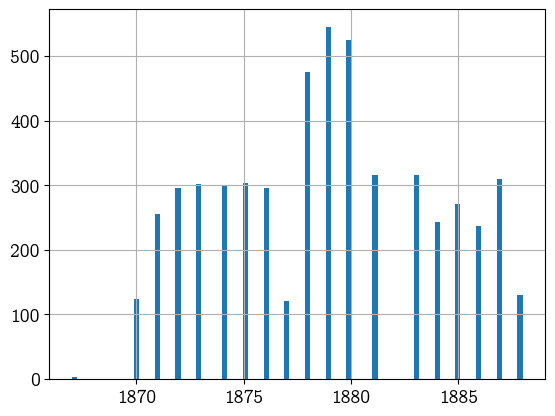

In [283]:
rz[rz.heading2.isin(['Telegraphische Depesche der Rigaschen Zeitung', 'Telegraphische Coursberichte', 'Telegramme'])].year.hist(bins=87)

Riga-Dünaburger Eisenbahn - al 26.01.1863
Neueste Nachrichten - al 11.02.1863 (ilmselt raudtee kaudu tulnud uudised?)
Telegraphische Nachrichten - al 10.03.1861 ("Wolff's telegraphisches Bureau" - järgi uurida)

In [304]:
rz.loc[rz.full_text.str.contains("Wolff's telegraph")]

,date,year,month,day,pub,heading,full_text,href,text_len,placename,origin_date,origin_month,heading2
150873,1861-03-14,1861,3,14,Rigasche Zeitung,CWolff's telegraphisches Bureau.),"CWolff's telegraphisches Bureau.)\nTurin, 20. ...",https://proc.dom.lndb.lv/file.axd?id=3925987&a...,879,None,None,None,CWolff's telegraphisches Bureau.)
151112,1861-04-04,1861,4,4,Rigasche Zeitung,Telegraphische Nachrichten.,Telegraphische Nachrichten.\n\n\tI (Wolff's te...,https://proc.dom.lndb.lv/file.axd?id=14186506&...,2222,None,None,None,Telegraphische Nachrichten
151311,1861-04-19,1861,4,19,Rigasche Zeitung,"(Wolff's telegraphisches Bureaus Turin, 28. (1...","(Wolff's telegraphisches Bureaus Turin, 28. (1...",https://proc.dom.lndb.lv/file.axd?id=2494439&a...,834,Turin,28,None,Turin
151423,1861-04-29,1861,4,29,Rigasche Zeitung,"(Wolff's telegraphisches Bureau.) Pesth, 8. Ma...","(Wolff's telegraphisches Bureau.) Pesth, 8. Ma...",https://proc.dom.lndb.lv/file.axd?id=11594427&...,937,Pesth,8,Mai,Pesth
151556,1861-05-09,1861,5,9,Rigasche Zeitung,(iJ'&gt;t (Wolff's telegraphisches Bureau.),(iJ'&gt;t (Wolff's telegraphisches Bureau.)\nP...,https://proc.dom.lndb.lv/file.axd?id=3540469&a...,1934,None,None,None,(iJ'&gt;t (Wolff's telegraphisches Bureau.)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159347,1863-02-02,1863,2,2,Rigasche Zeitung,(Wolff's telegraphisches Bureau.),"(Wolff's telegraphisches Bureau.)\nKassel, 10....",https://proc.dom.lndb.lv/file.axd?id=13440282&...,4878,None,None,None,(Wolff's telegraphisches Bureau.)
159396,1863-02-06,1863,2,6,Rigasche Zeitung,Telegraphische Nachrichten.,Telegraphische Nachrichten.\n\n\t(Wolff's tele...,https://proc.dom.lndb.lv/file.axd?id=6369419&a...,1559,None,None,None,Telegraphische Nachrichten
197963,1870-07-15,1870,7,15,Rigasche Zeitung,Inland.,Inland.\n\n\tïKigst. Г). Juli. Heute ist die g...,https://proc.dom.lndb.lv/file.axd?id=14252067&...,4754,None,None,None,Inland
231095,1876-10-18,1876,10,18,Rigasche Zeitung,Demonstrationen in Oesterreich- Ungarn.,Demonstrationen in Oesterreich- Ungarn.\n\n\tV...,https://proc.dom.lndb.lv/file.axd?id=3854037&a...,7769,None,None,None,Demonstrationen in Oesterreich- Ungarn


In [305]:
plot_speed_distribution('Moskau')

NameError: name 'plot_speed_distribution' is not defined

In [306]:
def jitter_dots(dots):
    offsets = dots.get_offsets()
    jittered_offsets = offsets
    # only jitter in the x-direction
    jittered_offsets[:, 0] += np.random.uniform(-0.5, 0.5, offsets.shape[0])
    jittered_offsets[:, 1] += np.random.uniform(-0.5, 0.5, offsets.shape[0])
    dots.set_offsets(jittered_offsets)
    
    
def plot_speed_distribution(place, savepath=None):
    
    plt.figure(figsize=(15,7))
    
    place_df = df[df.placename == place]
    dots = plt.scatter(x=place_df.doc_date.dt.year, y=place_df.delta, s=3, label=place, alpha=0.6)
    jitter_dots(dots)
        
    plt.xticks([i for i in range(1800, 1890) if i%5 == 0])
    plt.title(place, size=20)
    plt.ylabel('days', size=16)
    plt.ylim(0, 80)
    #plt.legend()
    plt.grid()
    
    if savepath:
        plt.savefig(savepath, bbox_inches='tight')
        
    plt.show()


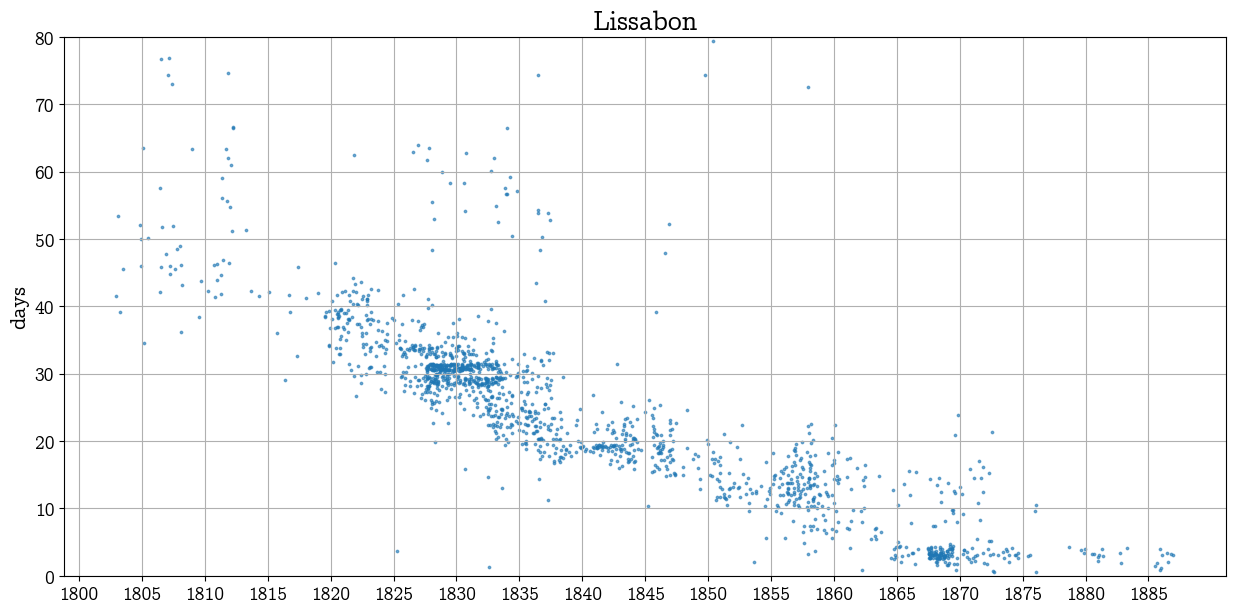

In [312]:
plot_speed_distribution('Lissabon')